# Load Data

In [1]:
csv_path = '../input/life-expectancy-who-pre-process/Life_expectancy_last_column.csv'


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
train_df = pd.read_csv(csv_path,index_col=0)
train_df.head()

,Year,Adult Mortality,Infant Deaths,Alcohol,Expenditure(%),Hepatitis B,Measles,BMI,Under-five Deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Years,Thinness 5-9 Years,ICOR,Schooling,Life Expectancy
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [2]:
import pickle as pkl

fileName =  '../input/a1-le-data-to-similar-events/Similarity'
fileObject2 = open(fileName, 'rb')
Imported_data = pkl.load(fileObject2)
fileObject2.close()

#print('Similarity Thresholds:',Imported_data[:,0])

#print('Most Similarity at:',Imported_data[:,1])

Similar_event_count = len(Imported_data[0,:])-1
print('Number of Similar Samples Considered', Similar_event_count)

Similarity_thresholds = Imported_data[:,0]

Sample_density = Similar_event_count/ Similarity_thresholds/100
#Sample_density = number of samples with less than 1% (of range) deviation

Similar_samples = Imported_data[:,1:Similar_event_count+1]

print('Target Shape', Sample_density.shape, 'Similar Samples Matrix Shape:', Similar_samples.shape)

Number of Similar Samples Considered 100
Target Shape (1649,) Similar Samples Matrix Shape: (1649, 100)


# Similar Indexes of a Sample

In [3]:
UB_point = 0.05 #ny value from 0 to 1

# UB_point (Uncertainty Bound) is the cumulative probability from the lower-end.

sample_no = 1402 #The sample we are considering 


input_=[]
output_=[]
for row in train_df.iloc:
    input_.append((row[0:len(row)-1]).astype(float))
    output_.append(row[-1])

number_of_input = len(row)-1
Output_column_number = len(row)

print(number_of_input)

indexes=Similar_samples[sample_no,:]

print(indexes.shape)


19
(100,)


# Plotting

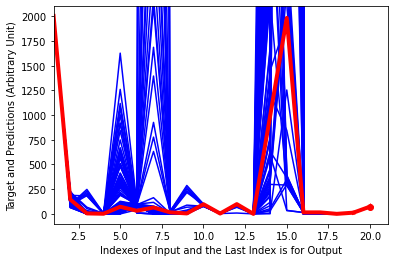

In [4]:
fig, (ax1) = plt.subplots(1, 1)

ax1.set(xlabel="Indexes of Input and the Last Index is for Output", ylabel="Target and Predictions (Arbitrary Unit)" , ylim = (-100, 2100), xlim = (1,21.1))
plt.rcParams["figure.figsize"] = (6,5)


Probability_density = []
for iter1 in indexes[1:]:
    #Plotting example Inputs
    #print(iter1)
    ax1.plot(range(1,number_of_input+1),input_[iter1.astype(np.int64)].values, 'b')
    ax1.plot([number_of_input, number_of_input+1],[ input_[iter1.astype(np.int64)].values[-1], output_[iter1.astype(np.int64)]],'grey')
    Probability_density.append(output_[iter1.astype(np.int64)])

iter1 = indexes[0]
ax1.plot(range(1,number_of_input+1),input_[iter1.astype(np.int64)].values, 'r', linewidth=4)
ax1.plot([number_of_input, number_of_input+1],[ input_[iter1.astype(np.int64)].values[-1], output_[iter1.astype(np.int64)]],'r', linewidth=4)
Probability_density.append(output_[iter1.astype(np.int64)])

Probability_density = np.sort(Probability_density)

ax1.plot(number_of_input+1,Probability_density[np.round(Similar_event_count*UB_point).astype(np.int64)-1], 'ro', linewidth=14)

ax1.plot(number_of_input+1,Probability_density[np.round(Similar_event_count*(1-UB_point)).astype(np.int64)-1], 'r+', linewidth=14)
